# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [82]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

/var/folders/g0/_1828z9153g6kz3d7mkzp9080000gn/T/ipykernel_19894/1669825240.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [83]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


<Axes: xlabel='Date'>

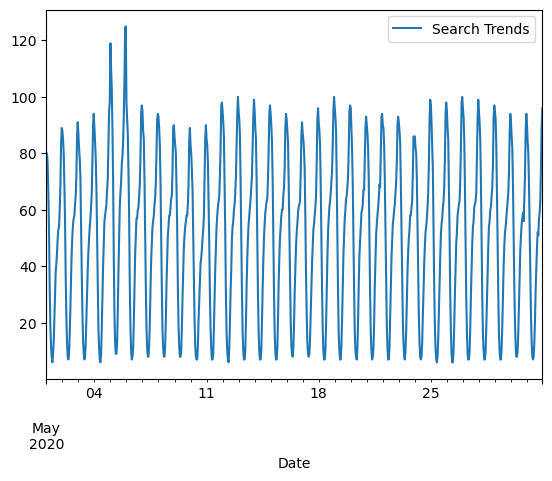

In [84]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Slice the DataFrame to just the month of May 2020
may_2020_data = df_mercado_trends.loc['2020-05-01':'2020-05-31']

# Plot to visualize the data for May 2020
may_2020_data.plot()

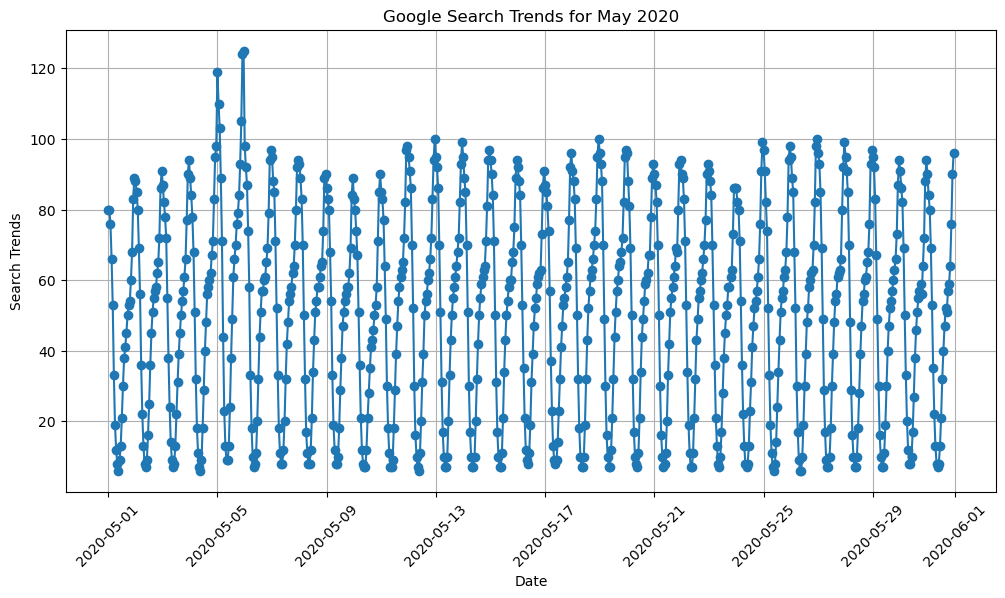

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(may_2020_data.index, may_2020_data['Search Trends'], marker='o', linestyle='-')
plt.title('Google Search Trends for May 2020')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [86]:
# Calculate the sum of the total search traffic for May 2020
traffic_totes_may_2020 = may_2020_data['Search Trends'].sum()

# Display the result
traffic_totes_may_2020

38181

In [87]:
import pandas as pd

# Define the months of financial releases
release_months = ['2020-04', '2020-05', '2020-06']

# Slice the DataFrame for the release months
release_months_data = pd.concat([
    df_mercado_trends.loc['2020-04-01':'2020-04-30'],
    df_mercado_trends.loc['2020-05-01':'2020-05-31'],
    df_mercado_trends.loc['2020-06-01':'2020-06-30']
])

# Calculate the total search traffic for the release months
traffic_april_2020 = release_months_data.loc['2020-04-01':'2020-04-30']['Search Trends'].sum()
traffic_may_2020 = release_months_data.loc['2020-05-01':'2020-05-31']['Search Trends'].sum()
traffic_june_2020 = release_months_data.loc['2020-06-01':'2020-06-30']['Search Trends'].sum()

# Group by year and month, calculate the sum for each month
monthly_search_traffic = df_mercado_trends.resample('M').sum()

# Calculate the median of the monthly sums
median_monthly_traffic = monthly_search_traffic['Search Trends'].median()

# Compare the search traffic for release months to the overall monthly median value
comparison_april = traffic_april_2020 / median_monthly_traffic
comparison_may = traffic_may_2020 / median_monthly_traffic
comparison_june = traffic_june_2020 / median_monthly_traffic

# Display the results
comparison_april, comparison_may, comparison_june

(1.0016063686118417, 1.0855355746677091, 1.0166465278271377)

In [88]:
# Calcluate the monhtly median search traffic across all months

# View the median_monthly_traffic value
monthly_median_search_traffic

Search Trends    35172.5
dtype: float64

In [89]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
comparing_traffic_to_median = traffic_totes_may_2020 / monthly_median_search_traffic
comparing_traffic_to_median

Search Trends    1.085536
dtype: float64

##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Yes, the month of May 2020 saw an 8,38% increase coming off of the heels of recent government mandated COVID lockdowns. The increase is Google search traffic parallels the accelerated growth rate of 75.8% YOY in April 2020.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

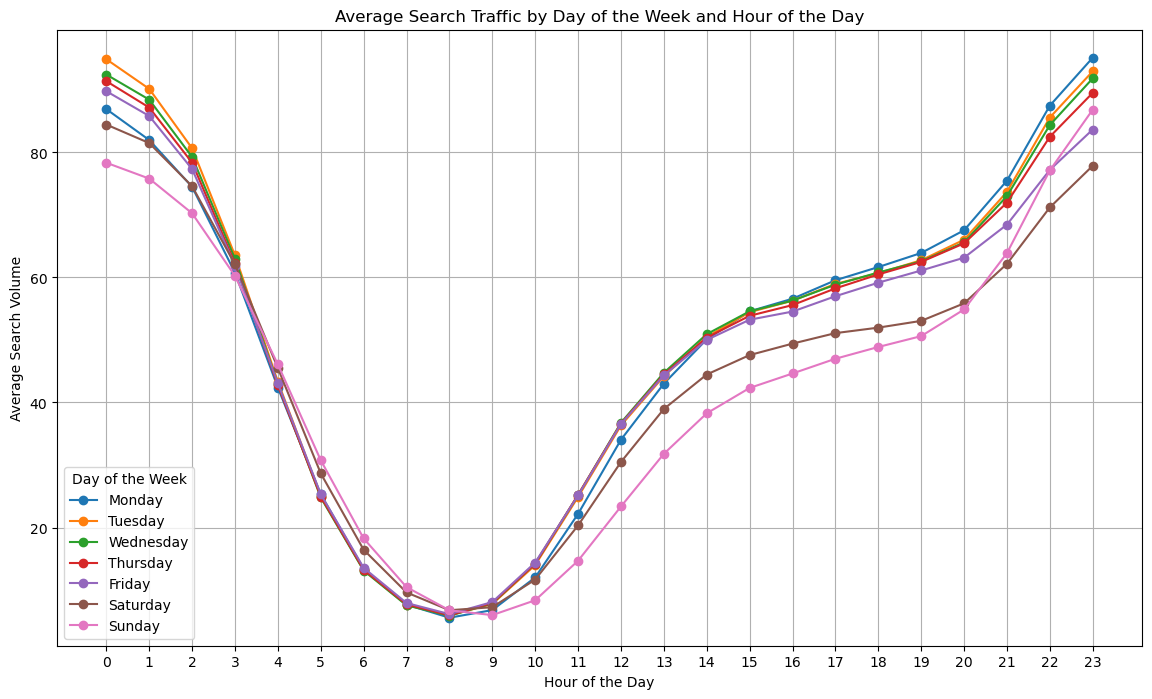

In [90]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_mercado_trends has been loaded and processed as per your instructions

# Group by day of the week and hour of the day, then calculate the mean
daily_hourly_avg_traffic = df_mercado_trends.groupby([df_mercado_trends.index.dayofweek, df_mercado_trends.index.hour])['Search Trends'].mean().unstack()

# Map days of the week to their names
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_hourly_avg_traffic.index = days_of_week

# Plot the average traffic by day of the week and hour of the day
plt.figure(figsize=(14, 8))
for day in daily_hourly_avg_traffic.index:
    plt.plot(daily_hourly_avg_traffic.columns, daily_hourly_avg_traffic.loc[day], marker='o', linestyle='-', label=day)

plt.title('Average Search Traffic by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Search Volume')
plt.legend(title='Day of the Week')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

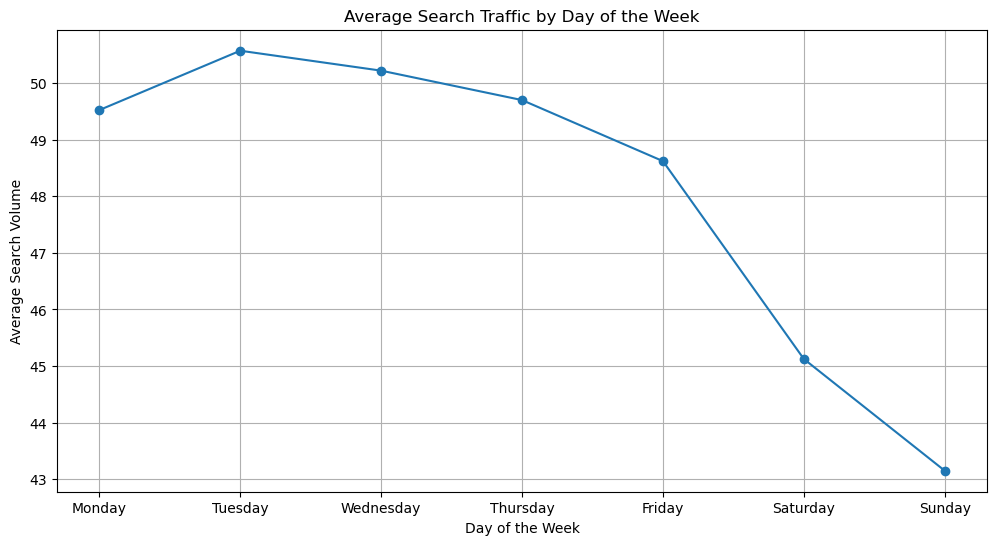

In [91]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.
daily_avg_traffic_iso = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().day)['Search Trends'].mean()

# Map ISO day of the week numbers to their names
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg_traffic_iso.index = days_of_week

# Plot the average traffic by day of the week
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_traffic_iso.index, daily_avg_traffic_iso, marker='o', linestyle='-')
plt.title('Average Search Traffic by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Search Volume')
plt.grid(True)
plt.show()

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

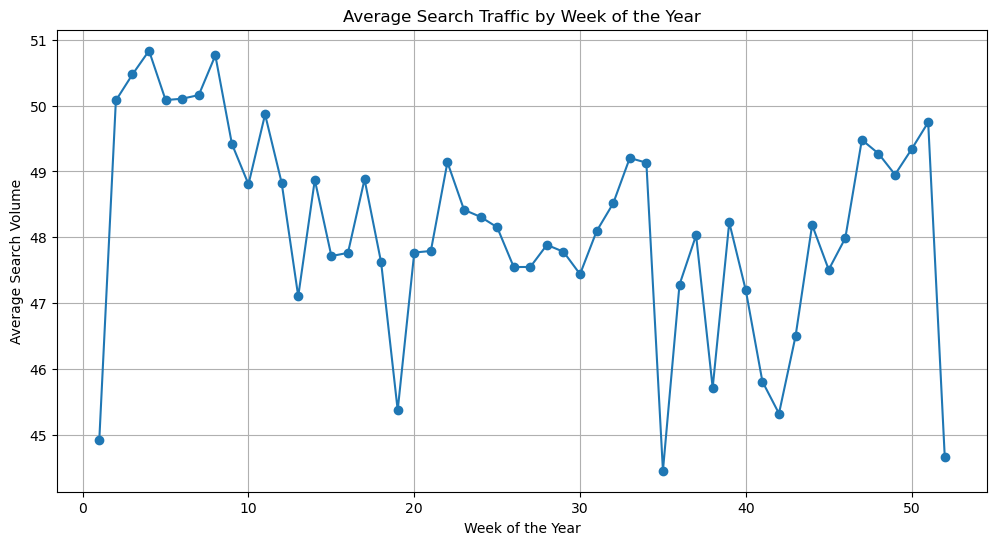

In [92]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
weekly_avg_traffic = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week)['Search Trends'].mean()

# Plot the average traffic by week of the year
plt.figure(figsize=(12, 6))
plt.plot(weekly_avg_traffic.index, weekly_avg_traffic, marker='o', linestyle='-')
plt.title('Average Search Traffic by Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Average Search Volume')
plt.grid(True)
plt.show()

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:** Yes, there is a seasonality that matches the announcements of government lockdowns beginning in May, post-holiday activity within the first 10 weeks, climate/seasonal changes drawing more people outdoors (or indoors depending on geography) come weeks 20 to 30 as well as weeks 40 to 50, and then holiday rush at the end of the year.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [93]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


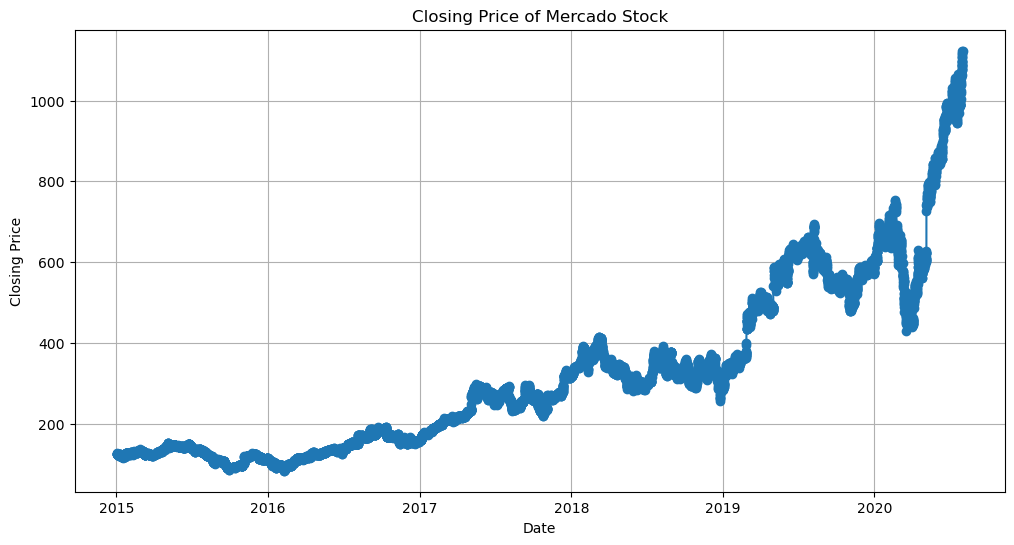

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock price data
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# Display the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

# Plot the closing price data
plt.figure(figsize=(12, 6))
plt.plot(df_mercado_stock.index, df_mercado_stock['close'], marker='o', linestyle='-')
plt.title('Closing Price of Mercado Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [95]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
combined_data = pd.concat([df_mercado_trends, df_mercado_stock], axis=1).dropna(how='any')

# View the first and last five rows of the DataFrame
display(combined_data.head(5))
display(combined_data.tail(5))

,Search Trends,close
2016-06-01 09:00:00,6.0,135.16
2016-06-01 10:00:00,12.0,136.63
2016-06-01 11:00:00,22.0,136.56
2016-06-01 12:00:00,33.0,136.42
2016-06-01 13:00:00,40.0,136.10


,Search Trends,close
2020-07-31 11:00:00,20.0,1105.780
2020-07-31 12:00:00,32.0,1087.925
2020-07-31 13:00:00,41.0,1095.800
2020-07-31 14:00:00,47.0,1110.650
2020-07-31 15:00:00,53.0,1122.510


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [96]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020 = combined_data.loc['2020-01-01':'2020-06-30']

# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head(5))
display(first_half_2020.tail(5))

,Search Trends,close
2020-01-02 09:00:00,9.0,601.085
2020-01-02 10:00:00,14.0,601.290
2020-01-02 11:00:00,25.0,615.410
2020-01-02 12:00:00,37.0,611.400
2020-01-02 13:00:00,50.0,611.830


,Search Trends,close
2020-06-30 11:00:00,17.0,976.17
2020-06-30 12:00:00,27.0,977.50
2020-06-30 13:00:00,37.0,973.23
2020-06-30 14:00:00,45.0,976.50
2020-06-30 15:00:00,51.0,984.93


,Search Trends,close
2020-01-02 09:00:00,9.0,601.085
2020-01-02 10:00:00,14.0,601.290
2020-01-02 11:00:00,25.0,615.410
2020-01-02 12:00:00,37.0,611.400
2020-01-02 13:00:00,50.0,611.830


,Search Trends,close
2020-06-30 11:00:00,17.0,976.17
2020-06-30 12:00:00,27.0,977.50
2020-06-30 13:00:00,37.0,973.23
2020-06-30 14:00:00,45.0,976.50
2020-06-30 15:00:00,51.0,984.93


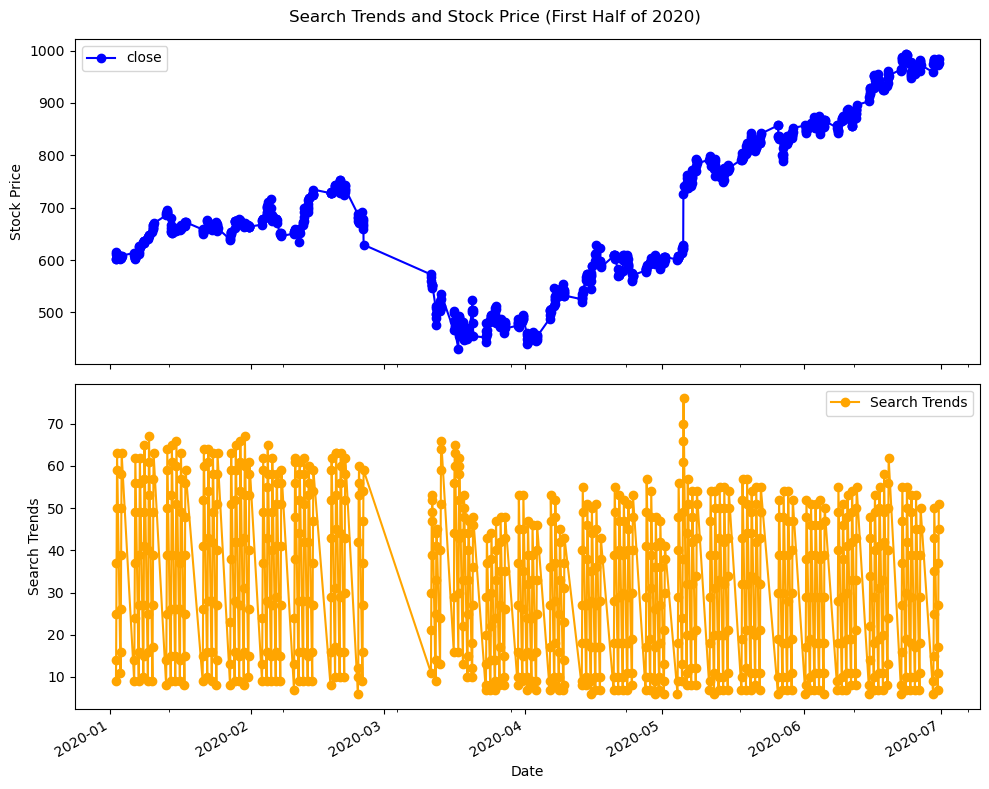

In [97]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_mercado_trends and df_mercado_stock have already been loaded and combined into combined_data
# combined_data = pd.concat([df_mercado_trends, df_mercado_stock], axis=1).dropna()

# Slice the combined DataFrame to just the first half of 2020
first_half_2020 = combined_data.loc['2020-01-01':'2020-06-30']

# Display the first and last five rows of the sliced DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())

# Plot the close and Search Trends data on separate axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# Plot closing price
first_half_2020['close'].plot(ax=axes[0], color='blue', linestyle='-', marker='o', label='close')
axes[0].set_ylabel('Stock Price')
axes[0].legend()

# Plot search trends
first_half_2020['Search Trends'].plot(ax=axes[1], color='orange', linestyle='-', marker='o', label='Search Trends')
axes[1].set_ylabel('Search Trends')
axes[1].legend()

# Set common labels
plt.xlabel('Date')
plt.suptitle('Search Trends and Stock Price (First Half of 2020)')

# Improve layout and display the plot
plt.tight_layout()
plt.show()

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** Yes, both time series indicate a common trend consistent with the narrative that many companies found market events to be difficult during 2020 but post-shock, e-commerce platforms gained new customers and increased revenue. Analyzing the trend of the stock price and the searches, both time series mirror the same fluctuations reflective of the market shock of March 2020. Additionally, as the stock price reflects steady growth the search trends also show increased activity, with both mirroring a spike during May of 2020 too. These time series indicate that MercadoLibre experienced steady revenue growth due to increased activity on their e-commerce platforms, reinforced by search trends.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [98]:
combined_data = pd.concat([df_mercado_trends, df_mercado_stock], axis=1).dropna()

In [99]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour

combined_data['Lagged Search Trends'] = combined_data['Search Trends'].shift(1)

combined_data['Hourly Stock Return'] = combined_data['close'].pct_change()

# Display the first few rows of the DataFrame to verify the new columns
display(combined_data.head(5))


,Search Trends,close,Lagged Search Trends,Hourly Stock Return
2016-06-01 09:00:00,6.0,135.16,NaN,NaN
2016-06-01 10:00:00,12.0,136.63,6.0,0.010876
2016-06-01 11:00:00,22.0,136.56,12.0,-0.000512
2016-06-01 12:00:00,33.0,136.42,22.0,-0.001025
2016-06-01 13:00:00,40.0,136.10,33.0,-0.002346


In [100]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
combined_data['Stock Volatility'] = combined_data['Hourly Stock Return'].rolling(window=4).std()
display(combined_data.head(5))

,Search Trends,close,Lagged Search Trends,Hourly Stock Return,Stock Volatility
2016-06-01 09:00:00,6.0,135.16,NaN,NaN,NaN
2016-06-01 10:00:00,12.0,136.63,6.0,0.010876,NaN
2016-06-01 11:00:00,22.0,136.56,12.0,-0.000512,NaN
2016-06-01 12:00:00,33.0,136.42,22.0,-0.001025,NaN
2016-06-01 13:00:00,40.0,136.10,33.0,-0.002346,0.006134


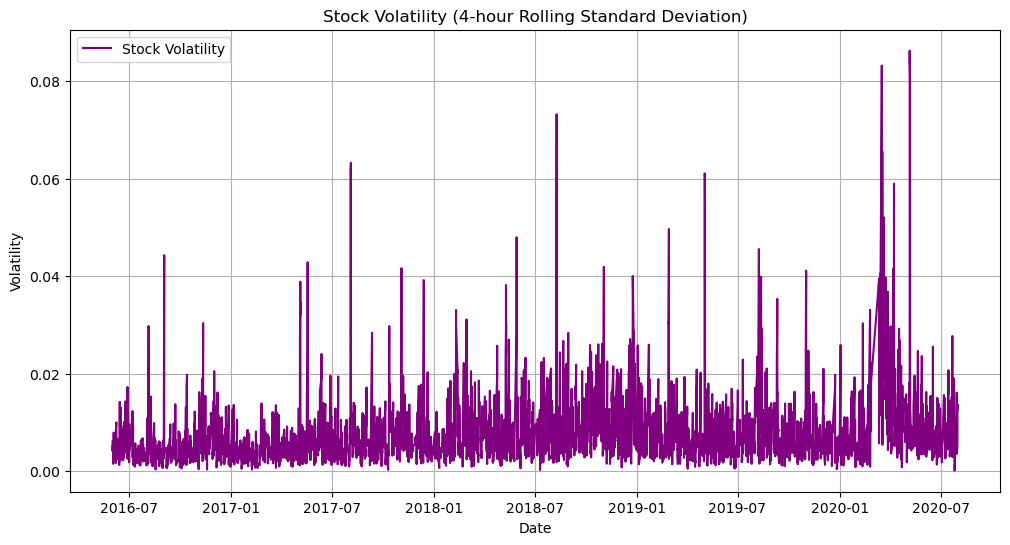

In [101]:
# Visualize the stock volatility
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['Stock Volatility'], label='Stock Volatility', color='purple')
plt.title('Stock Volatility (4-hour Rolling Standard Deviation)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [102]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
combined_data['Hourly Stock Return'] = combined_data['close'].pct_change() * 100


In [103]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(combined_data.head(5))
display(combined_data.tail(5))

,Search Trends,close,Lagged Search Trends,Hourly Stock Return,Stock Volatility
2016-06-01 09:00:00,6.0,135.16,NaN,NaN,NaN
2016-06-01 10:00:00,12.0,136.63,6.0,1.087600,NaN
2016-06-01 11:00:00,22.0,136.56,12.0,-0.051233,NaN
2016-06-01 12:00:00,33.0,136.42,22.0,-0.102519,NaN
2016-06-01 13:00:00,40.0,136.10,33.0,-0.234570,0.006134


,Search Trends,close,Lagged Search Trends,Hourly Stock Return,Stock Volatility
2020-07-31 11:00:00,20.0,1105.780,11.0,0.637986,0.012837
2020-07-31 12:00:00,32.0,1087.925,20.0,-1.614697,0.013549
2020-07-31 13:00:00,41.0,1095.800,32.0,0.723855,0.013295
2020-07-31 14:00:00,47.0,1110.650,41.0,1.355174,0.013001
2020-07-31 15:00:00,53.0,1122.510,47.0,1.067843,0.013566


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [105]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
combined_data[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
Hourly Stock Return,0.061424,0.017929,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** Based on the correlation table, a predictable relationship between lagged search traffic and the stock volatility or the lagged search traffic and the stock price returns does not exist meaning that within either pairing, lagged search traffic is not a good predictor of stock volatility nor stock price returns. 

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [108]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
mercado_prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
mercado_prophet_df = mercado_prophet_df.rename(columns={'Date': 'ds', 'Search Trends': 'y'})

# Drop an NaN values from the prophet_df DataFrame
mercado_prophet_df = mercado_prophet_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(mercado_prophet_df.head(5))
display(mercado_prophet_df.tail(5))

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [109]:
# Call the Prophet function, store as an object
model = Prophet()

In [110]:
# Fit the time-series model.
model.fit(mercado_prophet_df)

11:08:02 - cmdstanpy - INFO - Chain [1] start processing
11:08:10 - cmdstanpy - INFO - Chain [1] done processing


In [111]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
display(future_mercado_trends.tail(5))

,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [125]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast_mercado_trends.head(5))
display(forecast_mercado_trends.tail(5))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.129250,81.420179,97.407076,44.129250,44.129250,45.429305,45.429305,45.429305,41.452726,...,1.860133,1.860133,1.860133,2.116445,2.116445,2.116445,0.0,0.0,0.0,89.558555
1,2016-06-01 01:00:00,44.130313,77.583695,93.921659,44.130313,44.130313,41.875073,41.875073,41.875073,37.943506,...,1.810049,1.810049,1.810049,2.121518,2.121518,2.121518,0.0,0.0,0.0,86.005386
2,2016-06-01 02:00:00,44.131375,66.562604,84.128835,44.131375,44.131375,31.551566,31.551566,31.551566,27.656533,...,1.768474,1.768474,1.768474,2.126559,2.126559,2.126559,0.0,0.0,0.0,75.682942
3,2016-06-01 03:00:00,44.132438,51.857647,68.586606,44.132438,44.132438,16.284352,16.284352,16.284352,12.417280,...,1.735502,1.735502,1.735502,2.131569,2.131569,2.131569,0.0,0.0,0.0,60.416789
4,2016-06-01 04:00:00,44.133500,33.885685,51.190776,44.133500,44.133500,-0.830504,-0.830504,-0.830504,-4.678139,...,1.711088,1.711088,1.711088,2.136547,2.136547,2.136547,0.0,0.0,0.0,43.302997


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
39101,2020-11-30 04:00:00,44.820300,30.913672,48.025175,43.853543,45.890451,-5.537028,-5.537028,-5.537028,-4.678139,...,-1.746456,-1.746456,-1.746456,0.887566,0.887566,0.887566,0.0,0.0,0.0,39.283272
39102,2020-11-30 05:00:00,44.819509,15.365732,31.978944,43.851744,45.891736,-21.007444,-21.007444,-21.007444,-20.514583,...,-1.384577,-1.384577,-1.384577,0.891716,0.891716,0.891716,0.0,0.0,0.0,23.812065
39103,2020-11-30 06:00:00,44.818718,3.904340,20.609272,43.849944,45.893021,-32.972400,-32.972400,-32.972400,-32.844667,...,-1.023561,-1.023561,-1.023561,0.895829,0.895829,0.895829,0.0,0.0,0.0,11.846318
39104,2020-11-30 07:00:00,44.817927,-3.297719,12.960259,43.848144,45.892639,-40.243847,-40.243847,-40.243847,-40.478082,...,-0.665669,-0.665669,-0.665669,0.899905,0.899905,0.899905,0.0,0.0,0.0,4.574080
39105,2020-11-30 08:00:00,44.817135,-5.928514,11.261395,43.846345,45.891816,-42.438026,-42.438026,-42.438026,-43.028861,...,-0.313108,-0.313108,-0.313108,0.903943,0.903943,0.903943,0.0,0.0,0.0,2.379109


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

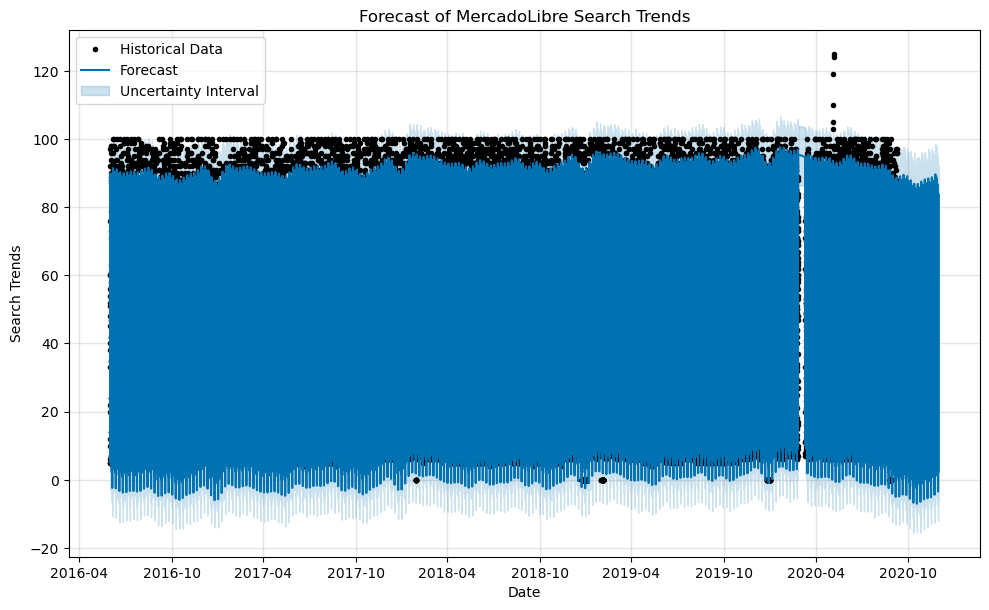

In [124]:
# Plot the Prophet predictions for the Mercado trends data
fig1 = model.plot(forecast_mercado_trends)
plt.title('Forecast of MercadoLibre Search Trends')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.legend(['Historical Data', 'Forecast', 'Uncertainty Interval'], loc='upper left')
plt.show()

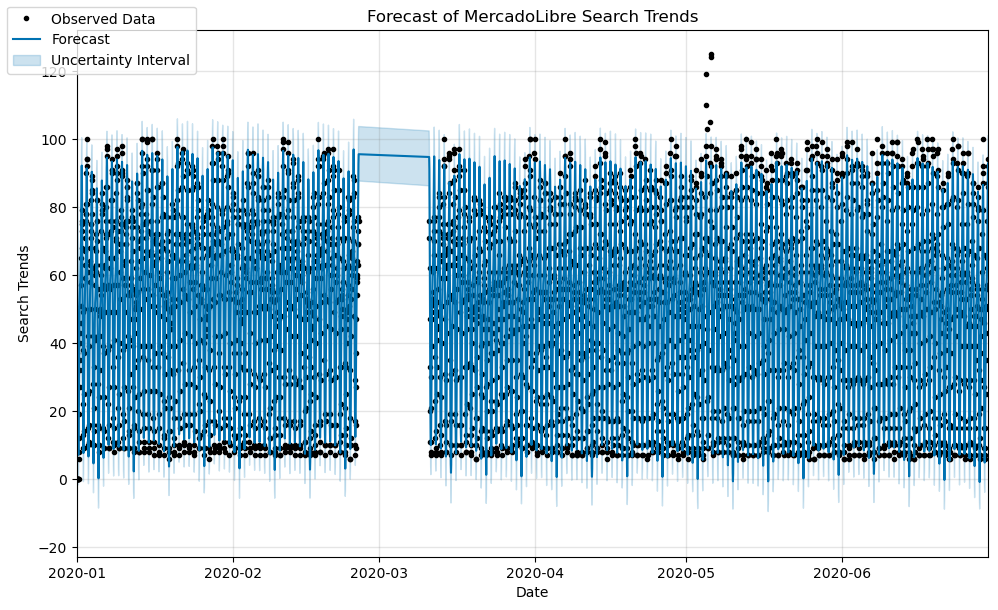

In [127]:
fig1 = model.plot(forecast_mercado_trends)

plt.title('Forecast of MercadoLibre Search Trends')
plt.xlabel('Date')
plt.ylabel('Search Trends')

plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-06-30'))

handles, labels = fig1.gca().get_legend_handles_labels()
fig1.legend(handles, ['Observed Data', 'Forecast', 'Uncertainty Interval'], loc='upper left')

plt.show()

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** The near-term forecast for the popularity of MercadoLibre looks to be stable overall. The uncertainty interval occurred during the announcement of lockdowns/COVID at 2020-03, but predicted values of the forecast match the peaks and troughs of the historically observed data, indicating high confidence and that MercadoLibre will maintain its popularity. Though there is an observed spike in the historical data at 2020-05, quite possibly in relation to relaxed COVID lockdowns globally, the stability of the search trends persists. 


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [114]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
mercado_prophet_df = df_mercado_trends.reset_index()
forecast_mercado_trends.set_index('ds', inplace=True)
forecast_mercado_trends_filtered = forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
display(forecast_mercado_trends_filtered.head(5))
display(forecast_mercado_trends_filtered.tail(5))

,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.558555,81.026198,98.144335
2016-06-01 01:00:00,86.005386,77.430164,94.449193
2016-06-01 02:00:00,75.682942,67.510197,83.949967
2016-06-01 03:00:00,60.416789,52.390219,68.867087
2016-06-01 04:00:00,43.302997,34.640670,52.146658


,yhat,yhat_lower,yhat_upper
ds,,,
2020-11-30 04:00:00,39.283272,31.318272,48.480601
2020-11-30 05:00:00,23.812065,15.123142,32.023435
2020-11-30 06:00:00,11.846318,3.820250,20.790573
2020-11-30 07:00:00,4.574080,-3.538051,13.056617
2020-11-30 08:00:00,2.379109,-6.496725,10.764901


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

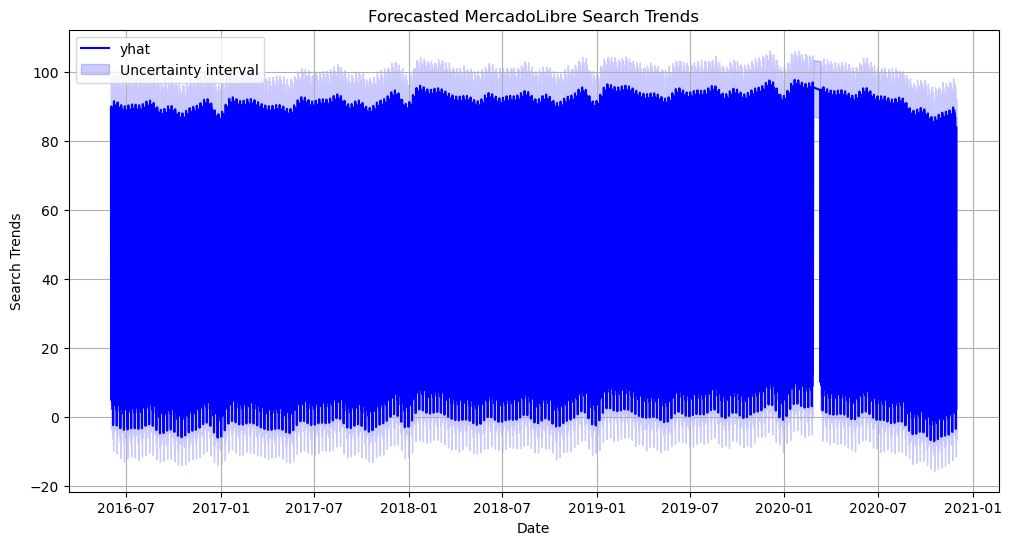

In [115]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
if 'ds' in forecast_mercado_trends.columns:
    forecast_mercado_trends.set_index('ds', inplace=True)

# View only the yhat, yhat_lower, and yhat_upper columns
forecast_mercado_trends_filtered = forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]

# Plot the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
plt.figure(figsize=(12, 6))
plt.plot(forecast_mercado_trends_filtered.index, forecast_mercado_trends_filtered['yhat'], label='yhat', color='blue')
plt.fill_between(forecast_mercado_trends_filtered.index, forecast_mercado_trends_filtered['yhat_lower'], forecast_mercado_trends_filtered['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty interval')
plt.title('Forecasted MercadoLibre Search Trends')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.legend()
plt.grid(True)
plt.show()

In [118]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends.reset_index(drop=True, inplace=True)
mercado_prophet_df = mercado_prophet_df.rename(columns={'Date': 'ds', 'Search Trends': 'y'})
mercado_prophet_df = mercado_prophet_df.dropna()

In [119]:
model = Prophet()

In [120]:
model.fit(mercado_prophet_df)

11:13:39 - cmdstanpy - INFO - Chain [1] start processing
11:13:47 - cmdstanpy - INFO - Chain [1] done processing


In [121]:
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')
forecast_mercado_trends = model.predict(future_mercado_trends)
forecast_mercado_trends.reset_index(drop=False, inplace=True)
display(forecast_mercado_trends.head(5))
display(forecast_mercado_trends.tail(5))

,index,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,2016-06-01 00:00:00,44.129250,81.695398,98.081043,44.129250,44.129250,45.429305,45.429305,45.429305,...,1.860133,1.860133,1.860133,2.116445,2.116445,2.116445,0.0,0.0,0.0,89.558555
1,1,2016-06-01 01:00:00,44.130313,76.867207,94.514257,44.130313,44.130313,41.875073,41.875073,41.875073,...,1.810049,1.810049,1.810049,2.121518,2.121518,2.121518,0.0,0.0,0.0,86.005386
2,2,2016-06-01 02:00:00,44.131375,67.667674,85.227743,44.131375,44.131375,31.551566,31.551566,31.551566,...,1.768474,1.768474,1.768474,2.126559,2.126559,2.126559,0.0,0.0,0.0,75.682942
3,3,2016-06-01 03:00:00,44.132438,52.023130,68.567398,44.132438,44.132438,16.284352,16.284352,16.284352,...,1.735502,1.735502,1.735502,2.131569,2.131569,2.131569,0.0,0.0,0.0,60.416789
4,4,2016-06-01 04:00:00,44.133500,35.842160,52.162721,44.133500,44.133500,-0.830504,-0.830504,-0.830504,...,1.711088,1.711088,1.711088,2.136547,2.136547,2.136547,0.0,0.0,0.0,43.302997


,index,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
39101,39101,2020-11-30 04:00:00,44.820300,30.774148,48.015329,43.837440,45.693151,-5.537028,-5.537028,-5.537028,...,-1.746456,-1.746456,-1.746456,0.887566,0.887566,0.887566,0.0,0.0,0.0,39.283272
39102,39102,2020-11-30 05:00:00,44.819509,15.368303,32.357037,43.835667,45.694256,-21.007444,-21.007444,-21.007444,...,-1.384577,-1.384577,-1.384577,0.891716,0.891716,0.891716,0.0,0.0,0.0,23.812065
39103,39103,2020-11-30 06:00:00,44.818718,3.353625,20.748579,43.833894,45.694491,-32.972400,-32.972400,-32.972400,...,-1.023561,-1.023561,-1.023561,0.895829,0.895829,0.895829,0.0,0.0,0.0,11.846318
39104,39104,2020-11-30 07:00:00,44.817927,-3.901390,12.989934,43.832121,45.693476,-40.243847,-40.243847,-40.243847,...,-0.665669,-0.665669,-0.665669,0.899905,0.899905,0.899905,0.0,0.0,0.0,4.574080
39105,39105,2020-11-30 08:00:00,44.817135,-6.330573,10.696198,43.830347,45.692460,-42.438026,-42.438026,-42.438026,...,-0.313108,-0.313108,-0.313108,0.903943,0.903943,0.903943,0.0,0.0,0.0,2.379109


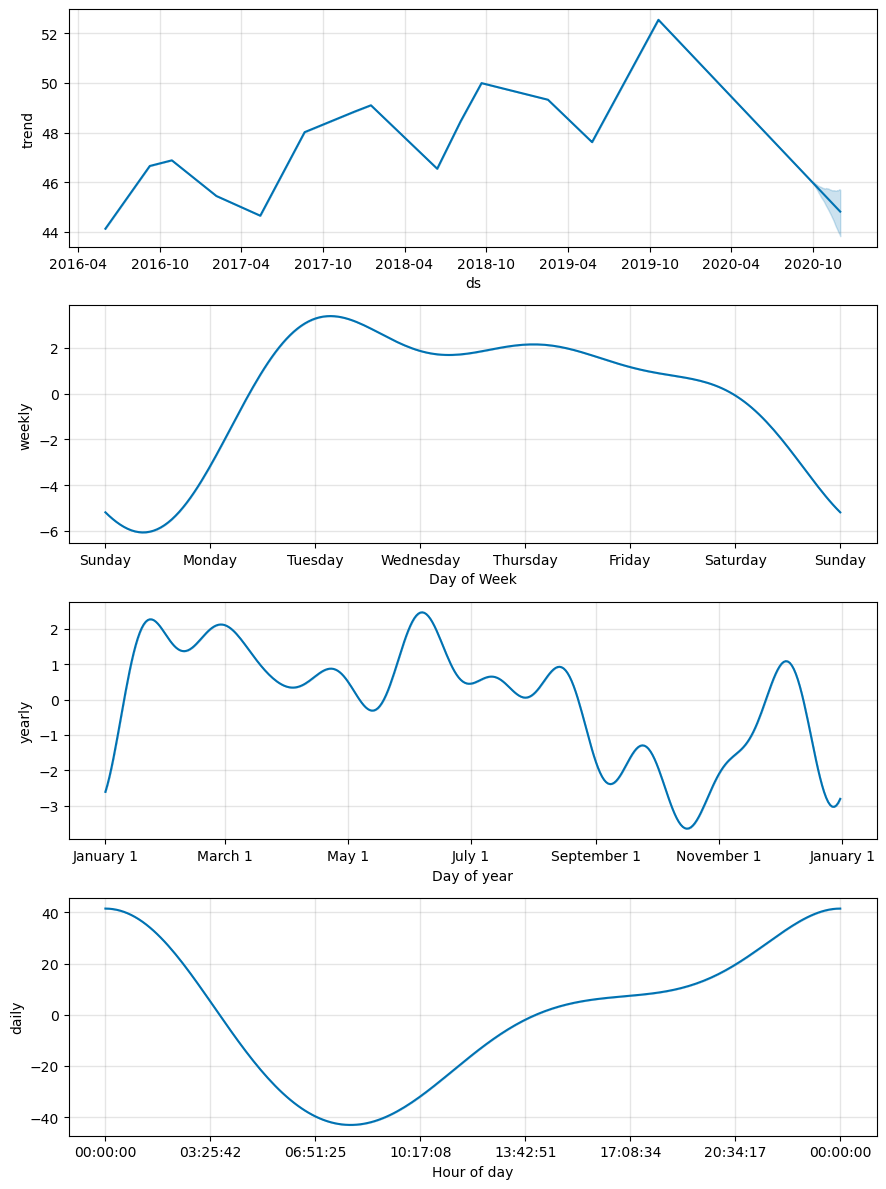

In [123]:
# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
fig = model.plot_components(forecast_mercado_trends)
plt.show()

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** Evening

**Question:** Which day of week gets the most search traffic?
   
**Answer:** Tuesday

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** January, November
